In [1]:
%%html
<style>
.cell-output-ipywidget-background {
    background-color: transparent !important;
}
:root {
    --jp-widgets-color: var(--vscode-editor-foreground);
    --jp-widgets-font-size: var(--vscode-editor-font-size);
}  
</style>

In [2]:
import datetime
import pyaurorax

aurorax = pyaurorax.PyAuroraX()
at = aurorax.tools

at.set_theme("dark")

In [27]:
# download an hour of TREx RGB data
dataset_name = "TREX_RGB_RAW_NOMINAL"
start_dt = datetime.datetime(2021, 11, 4, 3, 0)
end_dt = datetime.datetime(2021, 11, 4, 3, 59)
site_uid = "rabb"
r = aurorax.data.ucalgary.download(dataset_name, start_dt, end_dt, site_uid=site_uid)

In [28]:
# read in the hour of data
data = aurorax.data.ucalgary.read(r.dataset, r.filenames, n_parallel=5)

In [29]:
# scale all the images
#
# NOTE: you can scale all images or just one image
images_scaled = at.scale_intensity(data.data, min=10, max=120)

# Generate a montage for 10 frames of data

In [30]:
# create the montage
montage = at.montage.create(images_scaled[:, :, :, 0:10], data.timestamp[0:10])

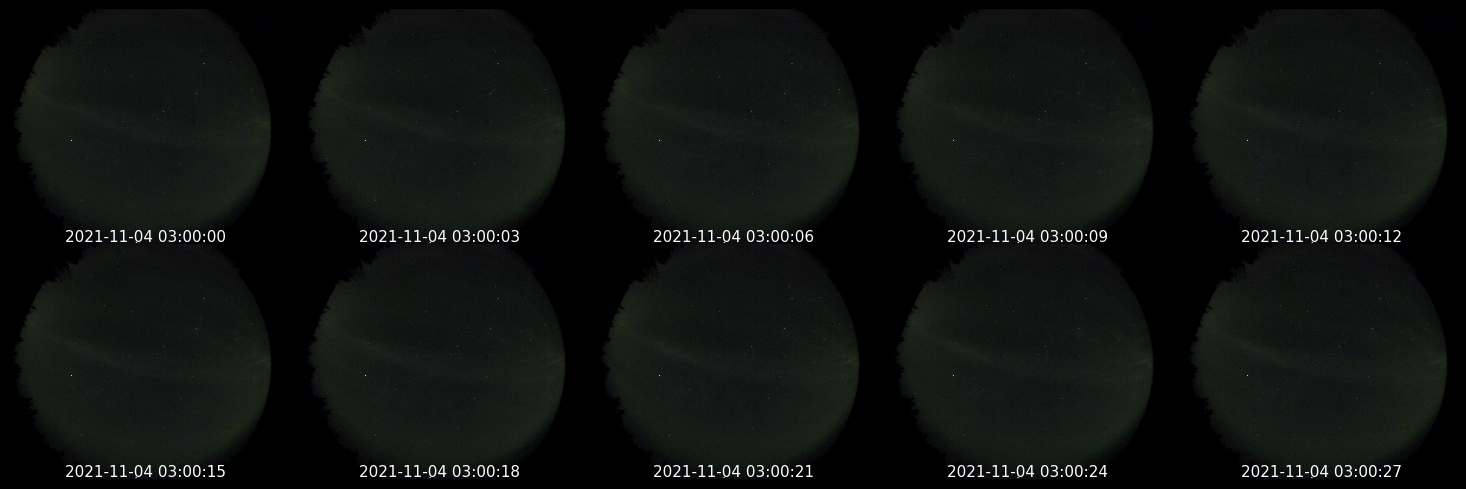

In [31]:
# plot the montage
montage.plot(2, 5, figsize=(15, 5), cmap="gray", timestamps_fontsize=11)

# Generate a montage for an hour of data

In [32]:
# we'll use the first frame of each minute, so let's extract the appropriate data
# object with that data
import numpy as np
first_minute_frames = np.empty((data.data.shape[0], data.data.shape[1], data.data.shape[2], 60), dtype=data.data.dtype)
first_minute_timestamps = []
counter = 0
for i in range(0, len(data.timestamp)):
    if (data.timestamp[i].second == 0):
        # 0-th second frame
        # 
        # add to our batch
        first_minute_frames[:,:,:,counter] = data.data[:,:,:,i]
        first_minute_timestamps.append(data.timestamp[i])
        counter += 1

# now that we have our data, let's create a montage object
montage = at.montage.create(first_minute_frames, first_minute_timestamps)

In [33]:
montage

Montage(data=array(dims=(480, 553, 3, 60), dtype=uint8), timestamp=[60 datetime objects])

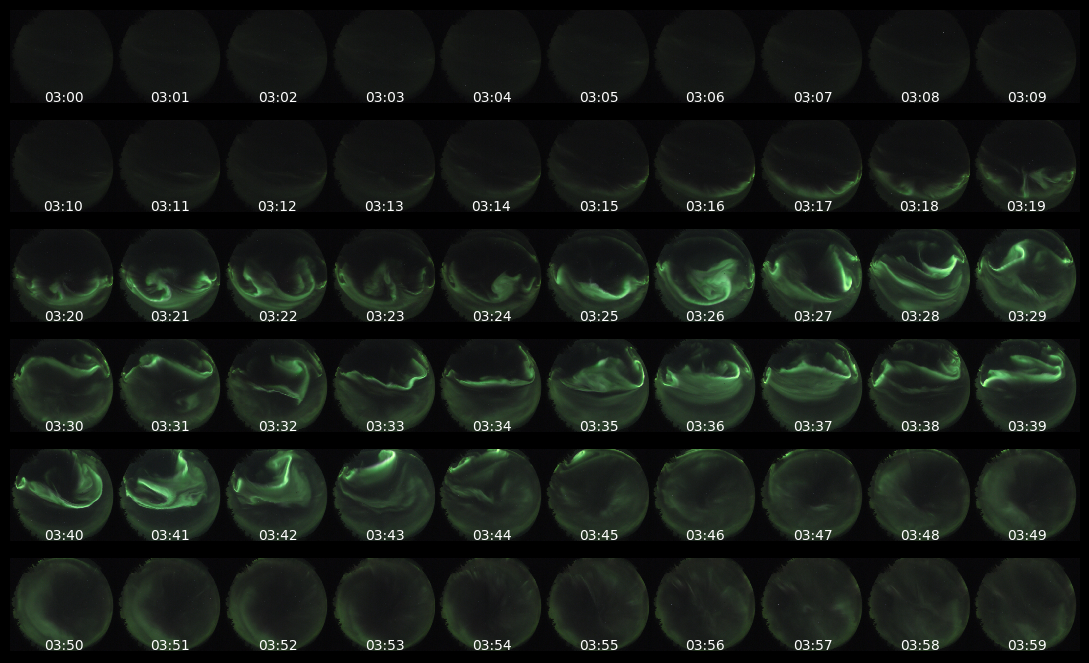

In [34]:
montage.plot(6, 10, figsize=(11, 7), timestamps_format="%H:%M", timestamps_fontsize=10)

# A slightly faster way of a 1-hour montage

In [35]:
# we can leverage the first_record parameter of the read function to do the work for us
# of extracting the first minute's data
data = aurorax.data.ucalgary.read(r.dataset, r.filenames, n_parallel=5, first_record=True)

# scale the data
images_scaled = at.scale_intensity(data.data, min=10, max=120)

# create the montage
montage = at.montage.create(data.data, data.timestamp)

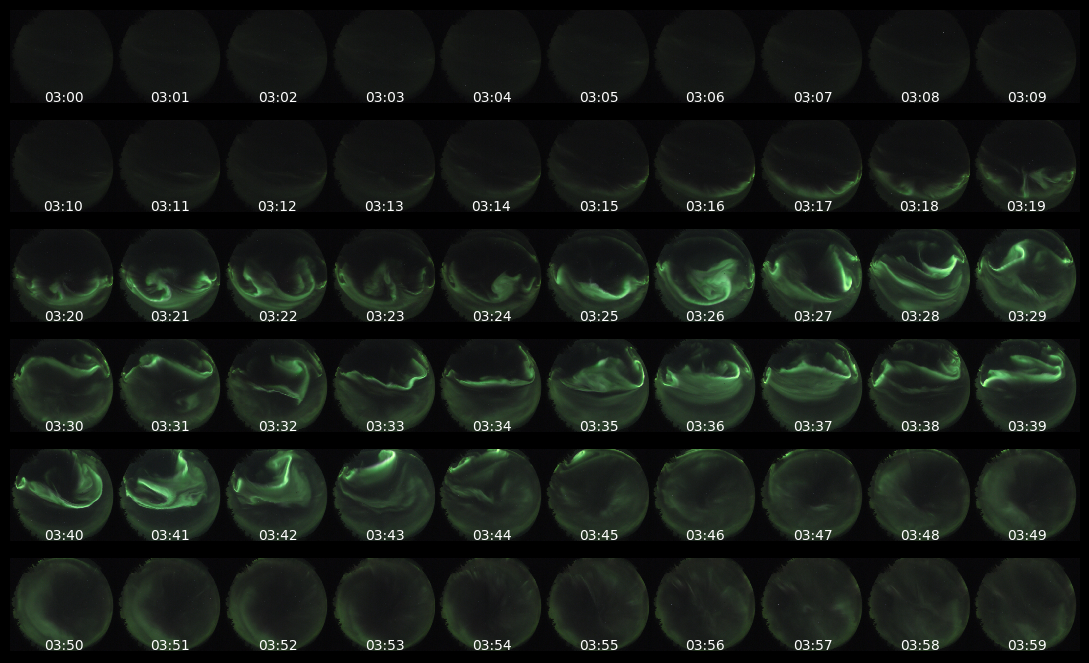

In [36]:
# plot the montage
montage.plot(6, 10, figsize=(11, 7), timestamps_format="%H:%M", timestamps_fontsize=10)